In [26]:
from verispy import VERIS
data_dir = "F:\\unay\\4th\\cs\\sec\\VCDB\\data\\json\\validated"

In [27]:
v = VERIS(json_dir=data_dir)

Found 8622 json files.


In [28]:
df = v.json_to_df(verbose=True)

Loading schema


  8%|██████▏                                                                      | 698/8622 [00:00<00:01, 6929.47it/s]

Loading JSON files to DataFrame.


  5%|███▊                                                                              | 8/173 [00:00<00:02, 79.42it/s]

Finished loading JSON files to dataframe.
Building DataFrame with enumerations.
Building enumeration columns.


100%|████████████████████████████████████████████████████████████████████████████████| 173/173 [00:10<00:00, 16.16it/s]


Done building DataFrame with enumerations.
Post-Processing DataFrame (A4 Names, Victim Industries, Patterns)
Finished building VERIS DataFrame


In [24]:
print(v.enumerations)

{'security_incident': ['Confirmed', 'Suspected', 'Near miss', 'False positive'], 'confidence': ['High', 'Medium', 'Low', 'None'], 'timeline.compromise.unit': ['Seconds', 'Minutes', 'Hours', 'Days', 'Weeks', 'Months', 'Years', 'Never', 'NA', 'Unknown'], 'timeline.exfiltration.unit': ['Seconds', 'Minutes', 'Hours', 'Days', 'Weeks', 'Months', 'Years', 'Never', 'NA', 'Unknown'], 'timeline.discovery.unit': ['Seconds', 'Minutes', 'Hours', 'Days', 'Weeks', 'Months', 'Years', 'Never', 'NA', 'Unknown'], 'timeline.containment.unit': ['Seconds', 'Minutes', 'Hours', 'Days', 'Weeks', 'Months', 'Years', 'Never', 'NA', 'Unknown'], 'victim.employee_count': ['Small', '1 to 10', '11 to 100', '101 to 1000', 'Large', '1001 to 10000', '10001 to 25000', '25001 to 50000', '50001 to 100000', 'Over 100000', 'Unknown'], 'victim.country': ['Unknown', 'AD', 'AE', 'AF', 'AG', 'AI', 'AL', 'AM', 'AO', 'AQ', 'AR', 'AS', 'AT', 'AU', 'AW', 'AX', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BL', 'BM', 'B

## How do internal and external attacks compare?

#### Basic Internal and External Statistics

In [25]:
#internal = v.enum_summary(df, 'actor.internal.variety', by='actor')
#external = v.enum_summary(df, 'actor.external.variety', by='actor')
actors = v.enum_summary(df, 'actor')
actors = actors[['enum', 'x']]
actors.columns = ['Actor Type', 'Count']
actors = actors.drop(2)
actors = actors.drop(3)

(3000.0, 4500.0)

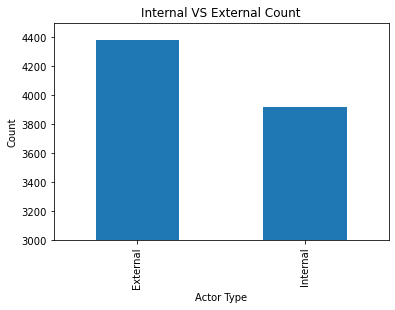

In [6]:
import matplotlib.pyplot as plt


ax = actors['Count'].plot(kind="bar")
plt.xlabel("Actor Type")
plt.ylabel("Count")
plt.title("Internal VS External Count")
ax.set_xticklabels(["External", "Internal"])
plt.ylim(3000, 4500)

In [7]:


internal = v.enum_summary(df, 'actor.internal.motive')
internal = internal.drop(internal.index[0])
internal = internal.drop(10)
internal = internal[['enum', 'x']]
internal.columns = ['internal Actor Motive', 'Count']

def avg(x):
    total = internal['Count'].sum()
    return round((x / total) * 100, 1)

internal['Percentage'] = internal['Count'].apply(lambda x: avg(x))
internal = internal.sort_values(by='Percentage', ascending=False)

internal.head(20)

,internal Actor Motive,Count,Percentage
1,Financial,758,56.7
2,Fun,267,20.0
3,Convenience,90,6.7
4,Espionage,83,6.2
5,Grudge,73,5.5
6,Other,44,3.3
7,Ideology,18,1.3
8,Fear,4,0.3
9,Secondary,0,0.0


In [8]:
external = v.enum_summary(df, 'actor.external.motive')
external = external.drop(10)
external = external.drop(5)
external = external[['enum', 'x']]
external.columns = ['External Actor Motive', 'Count']

def avg(x):
    total = external['Count'].sum()
    return round((x / total) * 100, 1)

external['Percentage'] = external['Count'].apply(lambda x: avg(x))
external = external.sort_values(by='Percentage', ascending=False)
external.head(20)

,External Actor Motive,Count,Percentage
0,Financial,2045,65.9
1,Ideology,387,12.5
2,Espionage,283,9.1
3,Fun,240,7.7
4,Grudge,109,3.5
6,Other,22,0.7
7,Secondary,13,0.4
8,Fear,4,0.1
9,Convenience,1,0.0


In [9]:
actors = v.enum_summary(df, 'actor')
actors.head()

,enum,x,n,freq
0,External,4379,8410.0,0.52069
1,Internal,3921,8410.0,0.46623
2,Partner,371,8410.0,0.04411
3,Unknown,212,NaN,NaN


In [10]:
cols = df.columns.values.tolist()
print(cols)

['action.Environmental', 'action.Error', 'action.Hacking', 'action.Malware', 'action.Misuse', 'action.Physical', 'action.Social', 'action.Unknown', 'action.environmental.notes', 'action.environmental.variety.Deterioration', 'action.environmental.variety.EMI', 'action.environmental.variety.ESD', 'action.environmental.variety.Earthquake', 'action.environmental.variety.Fire', 'action.environmental.variety.Flood', 'action.environmental.variety.Hazmat', 'action.environmental.variety.Humidity', 'action.environmental.variety.Hurricane', 'action.environmental.variety.Ice', 'action.environmental.variety.Landslide', 'action.environmental.variety.Leak', 'action.environmental.variety.Lightning', 'action.environmental.variety.Meteorite', 'action.environmental.variety.Other', 'action.environmental.variety.Particulates', 'action.environmental.variety.Pathogen', 'action.environmental.variety.Power failure', 'action.environmental.variety.Temperature', 'action.environmental.variety.Tornado', 'action.env

In [11]:
internal = df[df['actor.Internal']]
internal.head()
internal.shape

(3921, 2347)

In [12]:
external = df[df['actor.External']]
external.head()
external.shape

(4379, 2347)

In [13]:

#print(df['impact.loss.rating.Major'].dtype)

In [14]:
external_size = v.enum_summary(external, 'victim.employee_count')
external.head(100)

,action.Environmental,action.Error,action.Hacking,action.Malware,action.Misuse,action.Physical,action.Social,action.Unknown,action.environmental.notes,action.environmental.variety.Deterioration,...,victim.revenue.iso_currency_code.XPF,victim.revenue.iso_currency_code.YER,victim.revenue.iso_currency_code.ZAR,victim.revenue.iso_currency_code.ZMK,victim.revenue.iso_currency_code.ZWD,victim.secondary.amount,victim.secondary.notes,victim.secondary.victim_id,victim.state,victim.victim_id
1,False,False,False,False,False,True,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,OR,Corvallis Clinic
3,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,Universal Jobmatch
6,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,SC,Lexington Medical Center
7,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,Azerenerji
8,False,False,False,False,False,True,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,CA,Sutter Medical Foundation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,Nissan Canada Finance
181,False,False,False,True,False,False,True,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,CA,Hollywood Presbyterian Medical Center
187,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,Unknown
188,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,Valley View University


In [15]:
internal_size = v.enum_summary(internal, 'victim.employee_count')
internal_size.head(100)

,enum,x,n,freq
0,Over 100000,891,2788.0,0.31958
1,1001 to 10000,538,2788.0,0.19297
2,101 to 1000,382,2788.0,0.13702
3,11 to 100,211,2788.0,0.07568
4,Small,189,2788.0,0.06779
5,10001 to 25000,181,2788.0,0.06492
6,Large,138,2788.0,0.04950
7,1 to 10,114,2788.0,0.04089
8,25001 to 50000,89,2788.0,0.03192
9,50001 to 100000,55,2788.0,0.01973


In [16]:
df2 = v.enum_summary(df, 'victim.employee_count')
company_size = df2[['enum']]
company_size.columns = ['Employee Count']
company_size.insert(1, 'Internal', internal_size['x'], allow_duplicates=False)
company_size.insert(1, 'External', external_size['x'], allow_duplicates=False)
company_size.head()
company_size = company_size.drop(10)

Text(0.5, 1.0, 'Internal vs External Attacks based on Target Company Size')

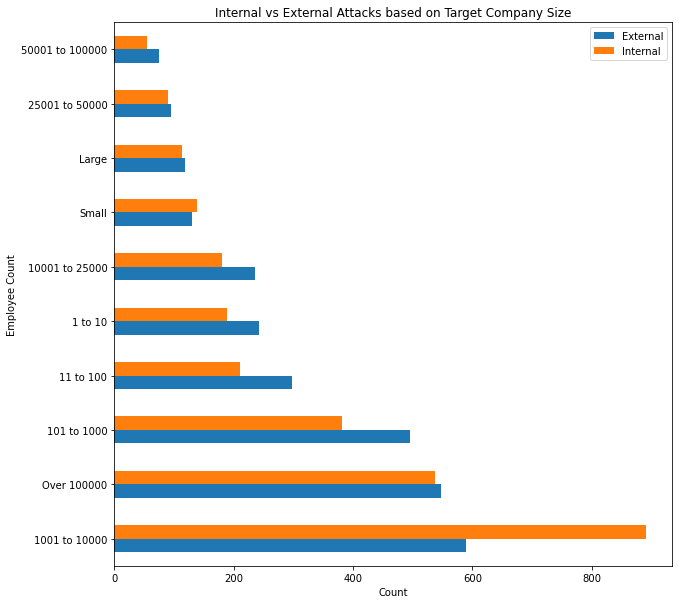

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

company_size['Employee Count'] = pd.Categorical(company_size['Employee Count'], ["Small", "Large", "1 to 10", "11 to 100", "101 to 1000", "1001 to 10000", "10001 to 25000", "25001 to 50000", "50001 to 100000", "Over 100000"])
#company_size.sort_values('Employee Count')
company_size.plot(kind="barh", x="Employee Count", figsize=(10,10))
#company_size.head()
plt.xlabel("Count")
plt.title("Internal vs External Attacks based on Target Company Size")

## Most Damaging Attacks in External and Internal

In [20]:
#external = df[df['actor.External']]
#impacts = v.enum_summary(df, 'impact.loss.rating')
attacks = v.enum_summary(df, 'action')
external = v.enum_summary(attacks, 'actor.External')
internal = v.enum_summary(attacks, 'actor.Internal')
internal_attacks = v.enum_summary(internal, 'action')
external_attacks = v.enum_summary(external, 'action')
#attacks = attacks[['enum']]
#attacks.insert(1, 'Internal', internal['x'], allow_duplicates=False)
attacks.head()


       enum     x       n     freq
0     Error  2522  8400.0  0.30024
1   Hacking  2284  8400.0  0.27190
2    Misuse  1738  8400.0  0.20690
3  Physical  1606  8400.0  0.19119
4   Malware   750  8400.0  0.08929


,enum,x,n,freq
0,Error,2522,8400.0,0.30024
1,Hacking,2284,8400.0,0.27190
2,Misuse,1738,8400.0,0.20690
3,Physical,1606,8400.0,0.19119
4,Malware,750,8400.0,0.08929


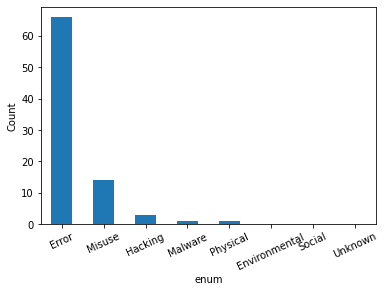

In [34]:
df_actors_developers = v.enum_summary(df, 'action', by='actor.internal.variety')
df_actors_developers = df_actors_developers[df_actors_developers['by'] == 'actor.internal.variety.Developer']
df_actors_developers.plot(kind='bar', x='enum', y='x', legend=False)
plt.xticks(rotation=25)
plt.ylabel('Count')
plt.savefig('df_actors_developers')